# 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 그리기 

In [4]:
election <- read.csv("../Data/election_result_ansi.csv", fileEncoding = 'euc-kr')
library(doBy)

In [19]:
# pop 4지역 추출, 3후보 aggreagate
# 후보(행),지역(열) dataframe

# 투표수가 가장 많은 4지역 구하기
elec_sum <- aggregate(pop~ 광역시도, election, sum)
top4Area <- orderBy(~ -pop, elec_sum)[1:4,1]
head(election)
top4Area

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359


[1] 경기도     서울특별시 부산광역시 경상남도  
17 Levels: 강원도 경기도 경상남도 경상북도 광주광역시 대구광역시 ... 충청북도

In [34]:
# election에서 각 후보의 광역시도별 득표율 구하기
elec_moon <- aggregate(moon ~ 광역시도, election, sum)
elec_hong <- aggregate(hong ~ 광역시도, election, sum)
elec_ahn <- aggregate(ahn ~ 광역시도, election, sum)
elec_moon

광역시도,moon
강원도,324768
경기도,3319812
경상남도,779731
경상북도,369726
광주광역시,583847
대구광역시,342620
대전광역시,404545
부산광역시,872127
서울특별시,2781345
세종특별자치시,77767


In [50]:
# 투표수가 1순위인 지역의 득표수 구하기
top4_1 <-
c(subset(elec_moon, 광역시도 == top4Area[1])[1,2],
subset(elec_hong, 광역시도 == top4Area[1])[1,2],
subset(elec_ahn, 광역시도 == top4Area[1])[1,2])
top4_1

[1] 3319812 1637345 1807308

In [51]:
top4_2 <-
c(subset(elec_moon, 광역시도 == top4Area[2])[1,2],
subset(elec_hong, 광역시도 == top4Area[2])[1,2],
subset(elec_ahn, 광역시도 == top4Area[2])[1,2])

In [52]:
top4_3 <-
c(subset(elec_moon, 광역시도 == top4Area[3])[1,2],
subset(elec_hong, 광역시도 == top4Area[3])[1,2],
subset(elec_ahn, 광역시도 == top4Area[3])[1,2])

In [53]:
top4_4 <-
c(subset(elec_moon, 광역시도 == top4Area[4])[1,2],
subset(elec_hong, 광역시도 == top4Area[4])[1,2],
subset(elec_ahn, 광역시도 == top4Area[4])[1,2])

In [54]:
top4 <- cbind(top4_1, top4_2, top4_3, top4_4)
top4

top4_1,top4_2,top4_3,top4_4
3319812,2781345,872127,779731
1637345,1365285,720484,790491
1807308,1492767,378907,284272


In [56]:
# 칼럼 이름 만들기
colnames(top4) <- top4Area
top4

경기도,서울특별시,부산광역시,경상남도
3319812,2781345,872127,779731
1637345,1365285,720484,790491
1807308,1492767,378907,284272


In [57]:
# row 이름 만들기
rownames(top4) <- c("문재인","홍준표","안철수")
top4

,경기도,서울특별시,부산광역시,경상남도
문재인,3319812,2781345,872127,779731
홍준표,1637345,1365285,720484,790491
안철수,1807308,1492767,378907,284272


In [58]:
class(top4)

[1] "matrix"

In [75]:
# 지수를 일반 숫자로 바꾸기 
options(scipen = 100) 

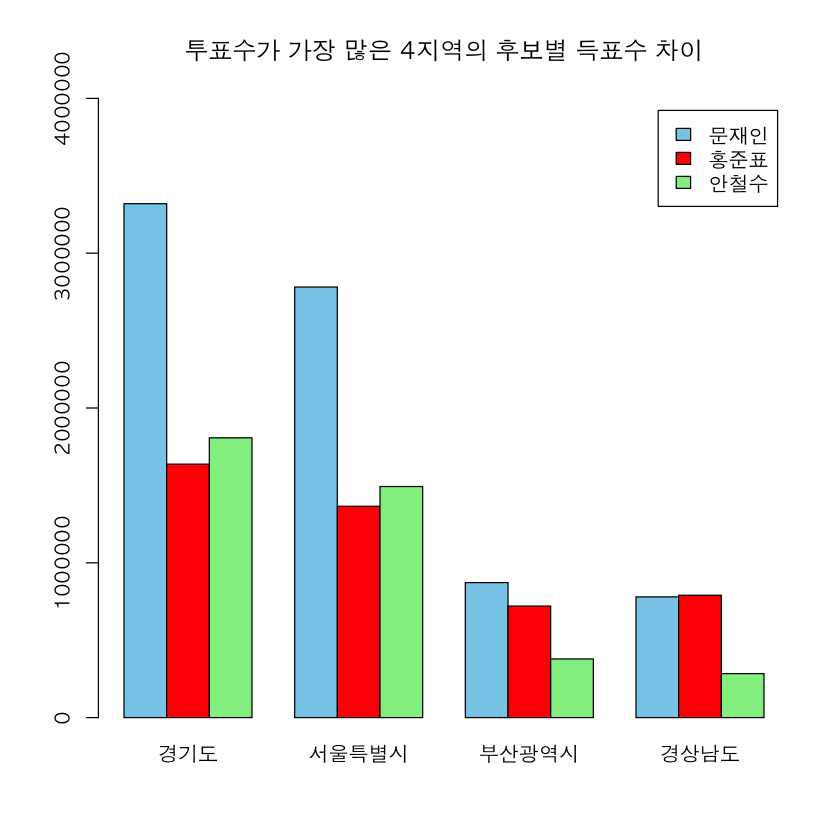

In [78]:
options(warn = -1)
par(family = "AppleGothic")

barplot(top4,
       beside = T,
       ylim = c(0,4000000),
       main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
       col = c("skyblue","red","light green"),
       legend.text = T)

# 투표수 높은 지역의 후보별 투표수 

In [96]:
# 시군별로 5등까지 찾아서 막대그래프 생성 
head(election)
top5Area <- orderBy(~ -pop, election)[1:5,]
top5Area

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359


,X,광역시도,시군,pop,moon,hong,ahn
86,85,경기도,부천시,543777,239697,100544,128297
24,23,서울특별시,송파구,441198,177328,98549,99018
99,98,경기도,남양주시,397972,165079,86026,92048
16,15,서울특별시,강서구,397108,175882,76601,88128
101,100,경기도,화성시,386002,176940,69014,84967


In [119]:
top5name <- paste(top5Area$광역시도,top5Area$시군) #경기도 부천시, 서울특별시 송파구...

In [122]:
top5 <- t(top5Area)[5:7,] # 행, 열끼리 바꾸기 (시군구니까 data 일일히 구하지 않고 t()로 행렬 위치만 바꿔줌)
top5
colnames(top5) <- top5name
rownames(top5) <- c("문재인","홍준표","안철수")
top5

,86,24,99,16,101
moon,239697,177328,165079,175882,176940
hong,100544,98549,86026,76601,69014
ahn,128297,99018,92048,88128,84967


,경기도 부천시,서울특별시 송파구,경기도 남양주시,서울특별시 강서구,경기도 화성시
문재인,239697,177328,165079,175882,176940
홍준표,100544,98549,86026,76601,69014
안철수,128297,99018,92048,88128,84967


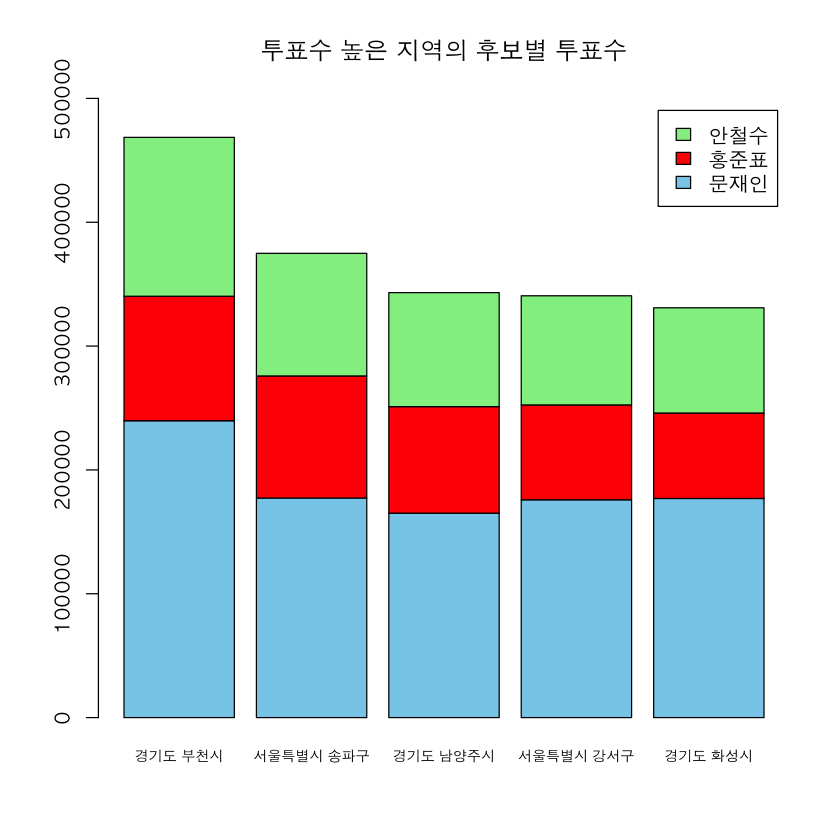

In [142]:
options(warn = -1)
par(family = "AppleGothic")

barplot(top5,
       ylim = c(0,500000),
       main = "투표수 높은 지역의 후보별 투표수",
       col = c("skyblue","red","light green"),
       legend.text = T,
       cex.names = 0.7)

---
# Baby names

In [151]:
# 인구 데이터 (1880~2014) 
# count 그 해 태어난 아이 이름 수

baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv")
head(baby)
tail(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [152]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : Factor w/ 93889 levels "Aaban","Aabha",..: 58869 5842 27035 26291 61544 57699 34165 3261 10695 75005 ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : Factor w/ 135 levels "01/01/1880 12:00:00 AM",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [153]:
# baby의 year 부분 정리하기 (일,월,시간은 없어도 됨) #1880은 7~10번째

baby$Year <- substr(baby$Year,7,10)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [155]:
write.csv(baby,"../Data/baby.csv", row.names=F)

In [160]:
# 년도별로 묶어야 함 (f,m으로 분리하고 year별로 합계 구하기)
# baby에서 여자아이만 Female이라는 데이터셋을 만들고 row 수 구하기
Female <- subset(baby, Gender == "F")
nrow(Female)

[1] 1081660

In [161]:
# baby에서 남자아이만 Male이라는 데이터셋을 만들고 row 수 구하기
Male <- subset(baby, Gender == "M")
nrow(Male)

[1] 743728

In [166]:
# Female에서 year을 기준으로 합계를 구하기
FFemale <- aggregate(Count ~ Year, Female, sum)
head(FFemale)

Year,Count
1880,90993
1881,91954
1882,107850
1883,112321
1884,129022
1885,133055


In [168]:
# Male에서 year을 기준으로 합계를 구하기
MMale <- aggregate(Count ~ Year, Male, sum)
head(MMale)

Year,Count
1880,110491
1881,100745
1882,113683
1883,104629
1884,114445
1885,107800


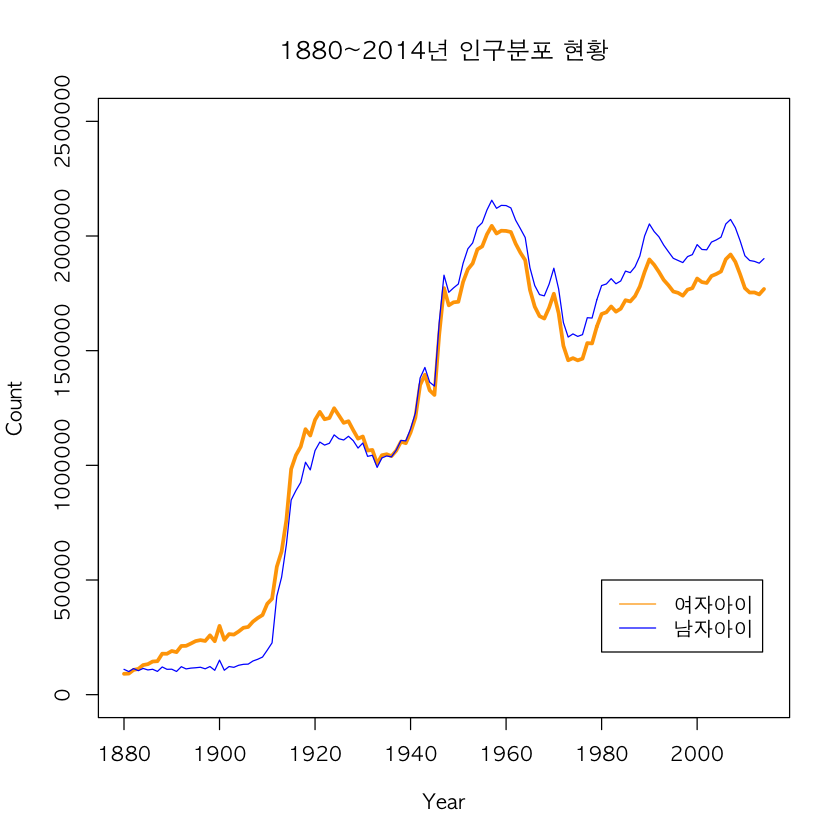

In [187]:
par(family = "AppleGothic")

# 선그래프 그리기 
# plot(FFemale$Year, FFemale$Count) or
plot(FFemale,
    main = "1880~2014년 인구분포 현황",
    type = "l", #선 모양
    col = "orange",
    ylim = c(0,2500000), # data 짤리니가 y축 늘려줌.
    lwd = 3 # 선 굵기 조정 
    )

# 남자아이 추가 
lines(MMale,
     col = "blue")

# 범례
legend(1980, 500000, 
       c("여자아이","남자아이"),
       #fill = c("orange","blue"),
       col = c("orange","blue"),       
       lty = 1 #직선 모양  
       )

# 기타 기능

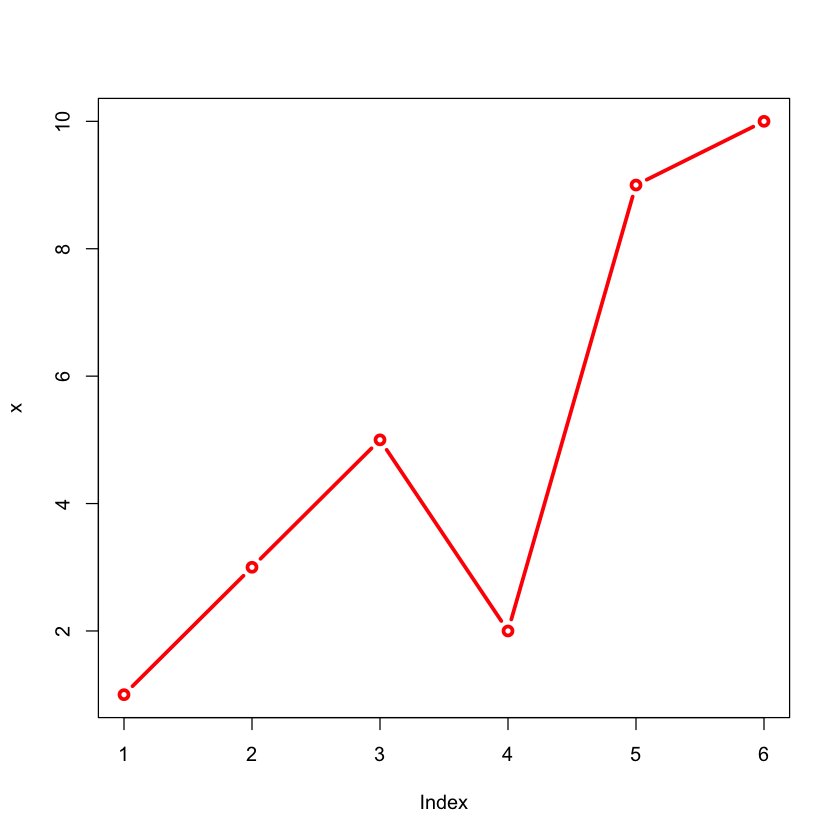

In [186]:
# 선 굵기 변경 

x <- c(1,3,5,2,9,10)
plot(x,
    type = "b", 
    col = "red",
    lwd = 3 #line width 선 굵기  
    )

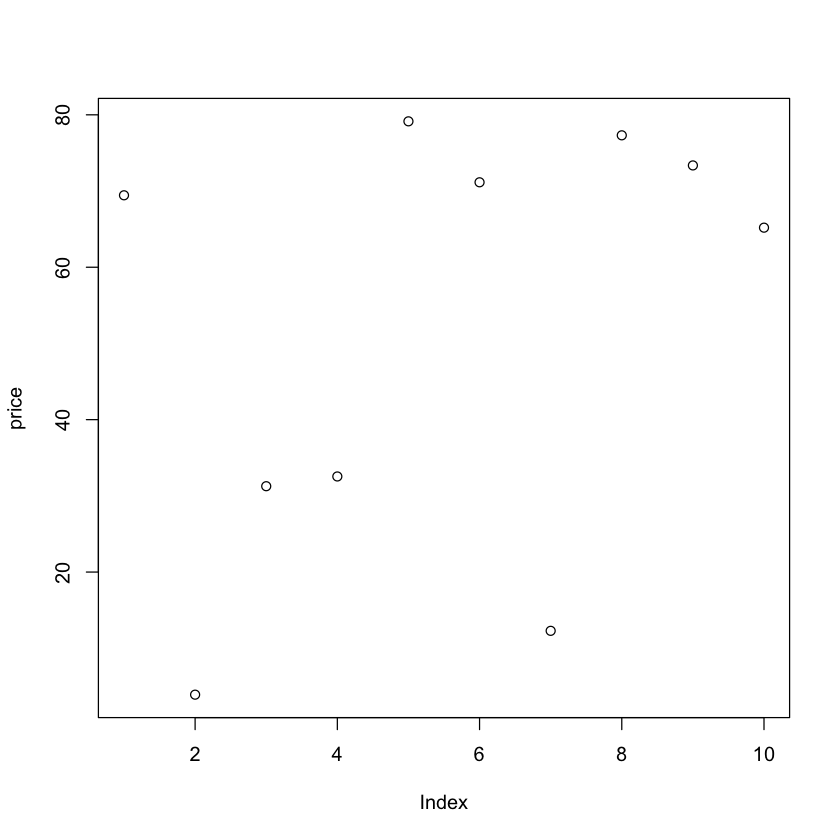

In [188]:
# 한 화면에 차트 여러 개 그려서 비교하기 

price <- runif(10,1,100)
plot(price)

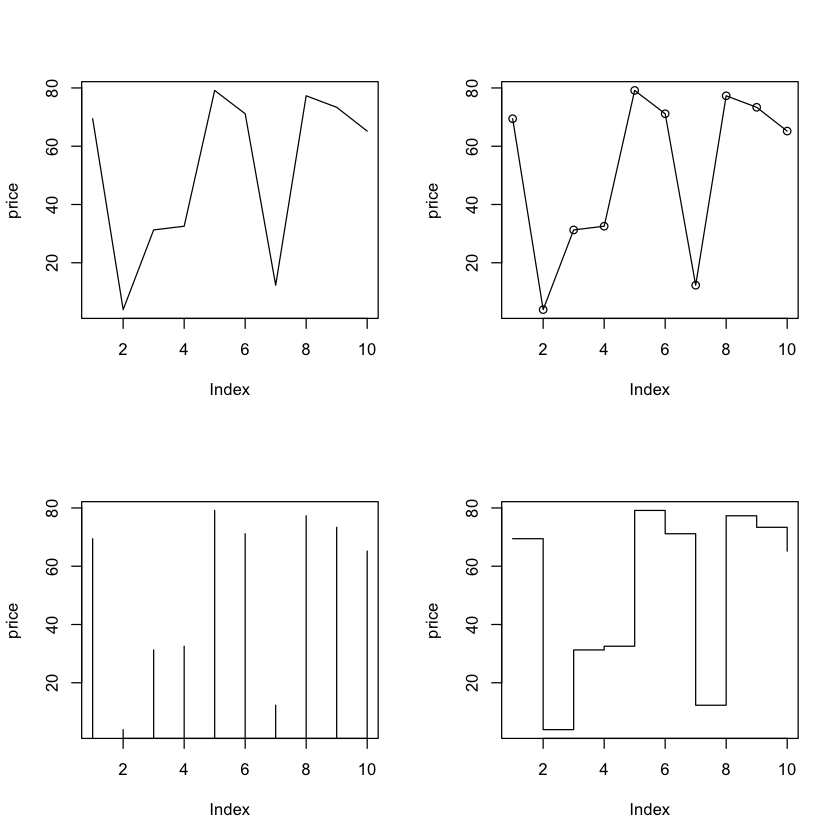

In [193]:
# type 속성으로 여러 화면 그리기 
# 2행 2열

par(mfrow = c(2,2)) #2행 2열 
plot(price, type = "l")
plot(price, type = "o")
plot(price, type = "h")
plot(price, type = "s")

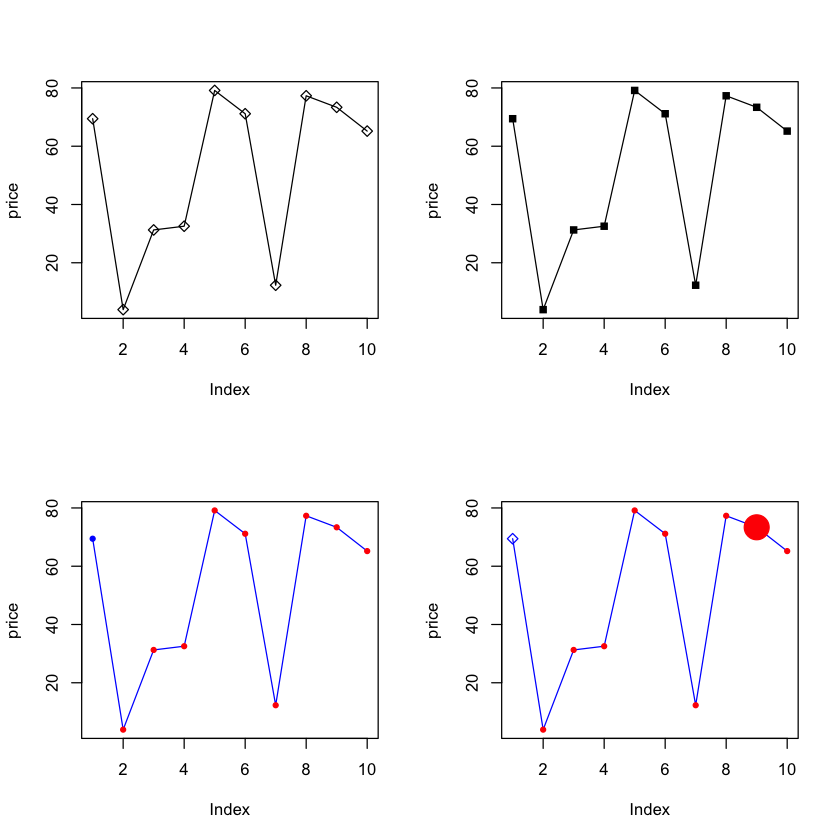

In [203]:
# pch 속성으로 여러 화면 그리기 
# 2행 2열

par(mfrow = c(2,2))
plot(price, type = "o", pch = 5)
plot(price, type = "o", pch = 15)
plot(price, type = "o", pch = 20, col = c("blue", rep("red",9))) #첫번째 빼고 점이 다 레드
plot(price, type = "o", pch = c(5, rep(20,9)), 
                        col = c("blue", rep("red",9)), # 첫번째만 다이아몬드 블루, 나머지 빨간 점
                        cex = c(rep(1,8),5,1)) #9번째만 점만 크게 5정도 규모로  -> 강조하는 부분! 

# 중첩 자료 시각화 

In [204]:
x <- c(1,2,3,4,2,4)
y <- rep(2,6)

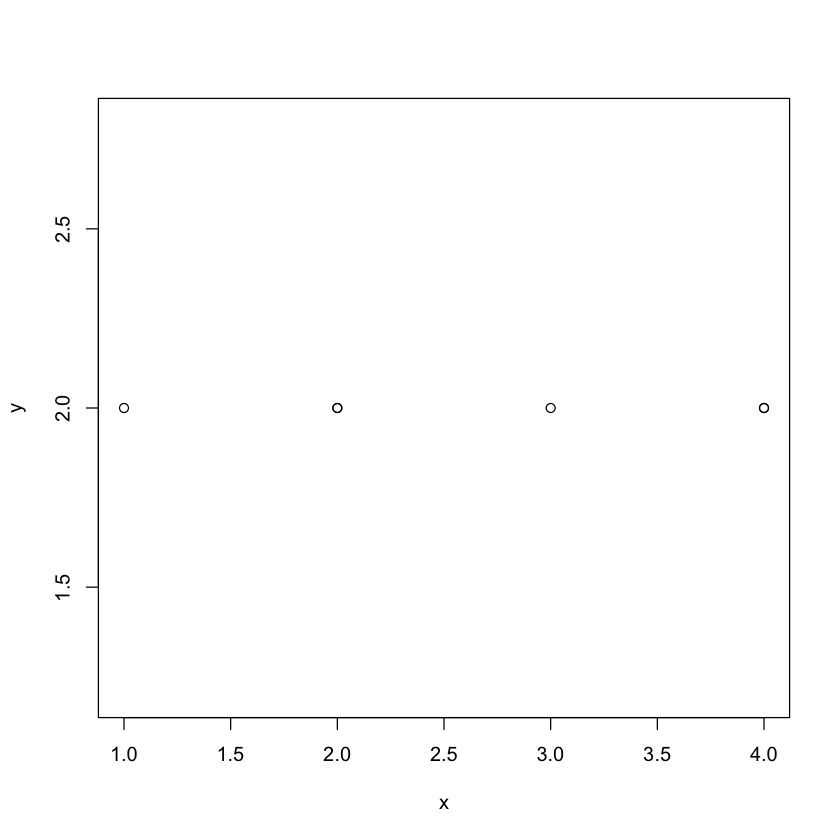

In [205]:
plot(x, y) # 2, 4 중복 데이터는 포인트를 크게 해야함. 